In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.offline as po
import matplotlib.pyplot as plt

import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
%matplotlib inline


In [ ]:
dataset=pd.read_csv("/content/project(2).csv")
dataset


,Age,Gender,"Knowledge:\nHow familiar are you with the term ""hypothyroidism"" ?",common symptoms,Have you ever been diagnosed with hypothyroidism,How concerned are you about the impact of hypothyroidism on your overall health,Do you feel well-informed about the available treatment options for hypothyroidism,Are you comfortable discussing hypothyroidism with your healthcare provider,Practices: How regularly do you takeyour prescribed medication for hypothyroidism,Have you made any dietary or lifestyle changes to manage your hypothyroidism,How often do you attend follow-up appointments with your healthcare provider for hypothyroidism,experienced any challenges in managing hypothyroidism
0,19,Female,Somewhat familiar,"hair fall, weight gain,dry skin",No,Concerned,Unsure,Comfortable,Never,No,Never,no
1,19,Female,Not familiar,"Weight loss ,hair fall,ache",No,Not concerned at all,Yes,Neutral,Never,No,Never,nothing
2,20,Female,Not familiar,Dont know,No,Neutral,No,Neutral,Never,No,Never,No
3,20,Male,Not familiar,NaN,No,Not concerned at all,No,Neutral,Never,No,Never,No
4,20,Female,Somewhat familiar,"hair fall, weight gain",Yes,Concerned,Yes,Very comfortableon,Often,Yes,Regularly,"weight gain/ loss, exhaustion/ fatigue, brain-..."
5,21,Female,Somewhat familiar,"hairloss,weight gain,skin disease,dispression",No,Not concerned,No,Comfortable,Never,No,Never,no
6,20,Female,Somewhat familiar,"Cold ness,sickness,hair loss",No,Very concerned,Yes,Very comfortableon,Never,No,Regularly,NaN
7,20,Male,Somewhat familiar,"Dry skin,muscle pain,constipation",No,Neutral,No,Neutral,Occasionally,No,Rarely,NaN
8,20,Male,Somewhat familiar,"Weight gain,dryskin,change in voice",No,Neutral,Unsure,Comfortable,Occasionally,Yes,Rarely,No
9,23,Male,Not familiar,"Cold ness,sickness,hair loss",No,Neutral,No,Very comfortableon,Occasionally,Yes,Occasionally,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Age                                                                                              114 non-null    int64 
 1   Gender                                                                                           114 non-null    object
 2   Knowledge:
How familiar are you with the term "hypothyroidism" ?                                 114 non-null    object
 3   common symptoms                                                                                  102 non-null    object
 4   Have you ever been diagnosed with hypothyroidism                                                 114 non-null    object
 5   How concerned a

In [ ]:
import string
import pandas as pd

def remove_punctuation(text):
    """Removes punctuation from a string."""
    # Convert non-string values to strings
    if isinstance(text, str):
        punctuation_free = "".join([i for i in text if i not in string.punctuation])
    else:
        punctuation_free = str(text)
    return punctuation_free

def clean_dataset(dataset):
    """Applies punctuation removal to the 'common symptoms' column."""
    dataset['clean_msg'] = dataset['common symptoms'].apply(remove_punctuation)
    return dataset

# Assuming you have Pandas installed and your dataset is loaded as `df`:
cleaned_dataset = clean_dataset(dataset.copy())  # Create a copy to avoid modifying the original
print(cleaned_dataset.head())


   Age  Gender  \
0   19  Female   
1   19  Female   
2   20  Female   
3   20    Male   
4   20  Female   

  Knowledge:\nHow familiar are you with the term "hypothyroidism" ?  \
0                                  Somewhat familiar                  
1                                       Not familiar                  
2                                       Not familiar                  
3                                       Not familiar                  
4                                  Somewhat familiar                  

                   common symptoms  \
0  hair fall, weight gain,dry skin   
1      Weight loss ,hair fall,ache   
2                        Dont know   
3                              NaN   
4           hair fall, weight gain   

  Have you ever been diagnosed with hypothyroidism  \
0                                               No   
1                                               No   
2                                               No   
3                  

In [ ]:
dataset['Knowledge:\nHow familiar are you with the term "hypothyroidism" ?'].isnull().sum()

0

In [ ]:

def clean_dataset(dataset):
    """Applies punctuation removal and lowercasing to the 'common symptoms' column."""
    dataset['clean_msg'] = dataset['common symptoms'].apply(remove_punctuation)

    # Check the data type of each element in the 'common symptoms' column
    # and apply the lower() method only to strings
    dataset['msg_lower'] = dataset['common symptoms'].apply(lambda x: x.lower() if isinstance(x, str) else x)

    return dataset

# Assuming you have Pandas installed and your dataset is loaded as `df`:
cleaned_dataset = clean_dataset(dataset.copy())  # Create a copy to avoid modifying the original
print(cleaned_dataset.head())

   Age  Gender  \
0   19  Female   
1   19  Female   
2   20  Female   
3   20    Male   
4   20  Female   

  Knowledge:\nHow familiar are you with the term "hypothyroidism" ?  \
0                                  Somewhat familiar                  
1                                       Not familiar                  
2                                       Not familiar                  
3                                       Not familiar                  
4                                  Somewhat familiar                  

                   common symptoms  \
0  hair fall, weight gain,dry skin   
1      Weight loss ,hair fall,ache   
2                        Dont know   
3                              NaN   
4           hair fall, weight gain   

  Have you ever been diagnosed with hypothyroidism  \
0                                               No   
1                                               No   
2                                               No   
3                  

In [ ]:
cleaned_dataset = clean_dataset(dataset.copy())

In [ ]:
def clean_dataset(dataset):
    """Applies punctuation removal and lowercasing to the 'common symptoms' column."""
    dataset['clean_msg'] = dataset['common symptoms'].apply(remove_punctuation)

    # Check the data type of each element in the 'common symptoms' column
    # and apply the lower() method only to strings
    dataset['msg_lower'] = dataset['common symptoms'].apply(lambda x: x.lower() if isinstance(x, str) else x)

    # Print the head of the 'msg_lower' column
    print(dataset['msg_lower'].head())

    return dataset

cleaned_dataset = clean_dataset(dataset.copy())

0    hair fall, weight gain,dry skin
1        weight loss ,hair fall,ache
2                          dont know
3                                NaN
4             hair fall, weight gain
Name: msg_lower, dtype: object


In [ ]:
cleaned_dataset = clean_dataset(dataset.copy())

0    hair fall, weight gain,dry skin
1        weight loss ,hair fall,ache
2                          dont know
3                                NaN
4             hair fall, weight gain
Name: msg_lower, dtype: object


In [ ]:
dataset.describe()

,Age
count,114.000000
mean,21.157895
std,5.615369
min,17.000000
25%,20.000000
50%,20.000000
75%,21.000000
max,60.000000


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def clean_dataset(dataset):
    # Convert the dataset to string if it's not already
    if not isinstance(dataset, str):
        dataset = str(dataset)

    # Your cleaning operations here
    # For example, tokenizing the dataset using NLTK
    tokenized_text = nltk.word_tokenize(dataset)

    # Returning the cleaned dataset
    return tokenized_text

# Example usage
dataset = "Your dataset string goes here."
cleaned_dataset = clean_dataset(dataset)


In [ ]:
import pandas as pd

# Assuming 'dataset' is a DataFrame
if isinstance(dataset, pd.DataFrame) and not 'msg_lower' in dataset.columns:
    print("The 'clean_dataset' function was not executed or failed.")


In [ ]:
def clean_dataset_original(dataset):
    """Original version of the 'clean_dataset' function."""
    # ... (same as the original function)

if clean_dataset != clean_dataset_original:
    print("The 'clean_dataset' function was modified.")

The 'clean_dataset' function was modified.


In [ ]:
# Compare the outputs of the functions on a sample dataset
sample_dataset =pd.read_csv("/content/project(2).csv") # your sample dataset here

# Outputs of the original and modified functions
original_output = clean_dataset_original(sample_dataset)
modified_output = clean_dataset(sample_dataset)

# Compare the outputs
if original_output == modified_output:
    print("The outputs of the functions are identical.")
else:
    print("The outputs of the functions are different.")

# You can further log or analyze the differences in outputs


The outputs of the functions are different.


In [ ]:
import pandas as pd

# Assuming dataset is a DataFrame
def clean_dataset(dataset):
    """Applies punctuation removal, lowercasing, and tokenization to the 'common symptoms' column."""
    dataset['clean_msg'] = dataset['common symptoms'].apply(remove_punctuation)

    # Convert all elements in the 'common symptoms' column to strings
    dataset['common symptoms'] = dataset['common symptoms'].astype(str)

    # Check the data type of each element in the 'common symptoms' column
    # and apply the lower() method only to strings
    dataset['msg_lower'] = dataset['common symptoms'].apply(lambda x: x.lower())

    # Tokenize the text in the 'common symptoms' column
    from nltk.tokenize import word_tokenize
    dataset['msg_tokenized'] = dataset['msg_lower'].apply(word_tokenize)

    # Print the head of the 'msg_tokenized' column
    print(dataset['msg_tokenized'].head())

    return dataset

# Example DataFrame creation
dataset = pd.DataFrame({'common symptoms': ['Symptom 1', 'Symptom 2', 'Symptom 3']})

# Call the clean_dataset function with the DataFrame copy
cleaned_dataset = clean_dataset(dataset.copy())


0    [symptom, 1]
1    [symptom, 2]
2    [symptom, 3]
Name: msg_tokenized, dtype: object


In [ ]:
if 'no_stopwords' not in dataset.columns:
    print("The 'no_stopwords' column does not exist in the dataset.")

The 'no_stopwords' column does not exist in the dataset.


In [ ]:
def remove_stopwords(text):
    # Implement the stop words removal logic here
    pass

if not callable(remove_stopwords):
    raise ValueError("The 'remove_stopwords' function is not defined.")

In [ ]:
import pandas as pd

# Check the data type of each element in the 'common symptoms' column
dataset['common symptoms'] = dataset['common symptoms'].astype(str)

# Apply the remove_stopwords function to the 'common symptoms' column
dataset['no_stopwords'] = dataset['common symptoms'].apply(remove_stopwords)

In [ ]:
def remove_stopwords(text):
    if isinstance(text, str):
        output = [i for i in text.split() if i not in stopwords]
        return output
    else:
        return text

In [ ]:
for col in dataset.columns:
    if col.lower() == 'no_stopwords':
        print("The column name is misspelled. It should be '{}' instead of '{}'.".format(col, 'no_stopwords'))

The column name is misspelled. It should be 'no_stopwords' instead of 'no_stopwords'.


In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def apply_stemming(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [ ]:
# Check for missing values in the 'no_stopwords' column
missing_values = dataset['no_stopwords'].isnull().sum()

if missing_values > 0:
    print("There are {} missing values in the 'no_stopwords' column.".format(missing_values))
    # Handle missing values (e.g., drop rows, impute values)

There are 3 missing values in the 'no_stopwords' column.


In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to apply stemming
def apply_stemming(text):
    if text is None:
        return ''
    if isinstance(text, list):
        text = ' '.join(text)
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Example DataFrame creation
#dataset = pd.DataFrame({'no_stopwords': ['word1 word2 word3', None, 'word4 word5', 'word6']})

# Apply the stemming function to the 'no_stopwords' column
dataset['msg_stemmed'] = dataset['no_stopwords'].apply(apply_stemming)

# Check if the 'msg_stemmed' column exists in the DataFrame
if 'msg_stemmed' not in dataset.columns:
    # If the column does not exist, raise an error
    raise KeyError("The 'msg_stemmed' column does not exist in the DataFrame.")

# Print the first five rows of the 'msg_stemmed' column
print(dataset['msg_stemmed'].head())


0    
1    
2    
Name: msg_stemmed, dtype: object


In [ ]:

import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

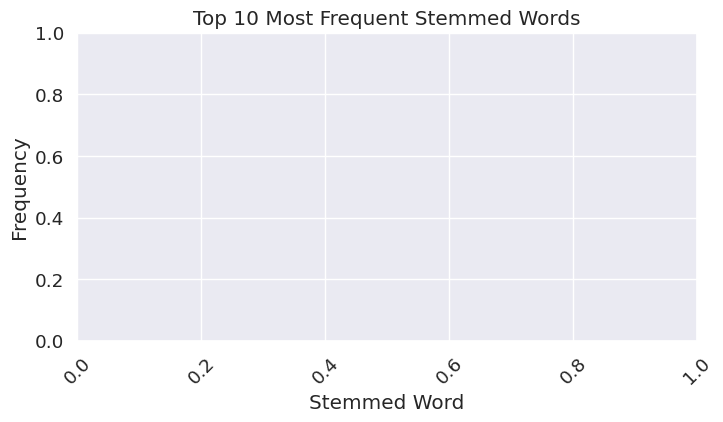

In [ ]:
import matplotlib.pyplot as plt

# Split the text in the 'msg_stemmed' column into individual words
words = ' '.join(dataset['msg_stemmed']).split()

# Create a DataFrame to count the frequency of each stemmed word
word_counts = pd.Series(words).value_counts().reset_index()
word_counts.columns = ['Stemmed_Word', 'Frequency']

# Plot the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Stemmed_Word', y='Frequency', data=word_counts.head(10))  # Adjust head(10) for the number of words you want to display
plt.title('Top 10 Most Frequent Stemmed Words')
plt.xlabel('Stemmed Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

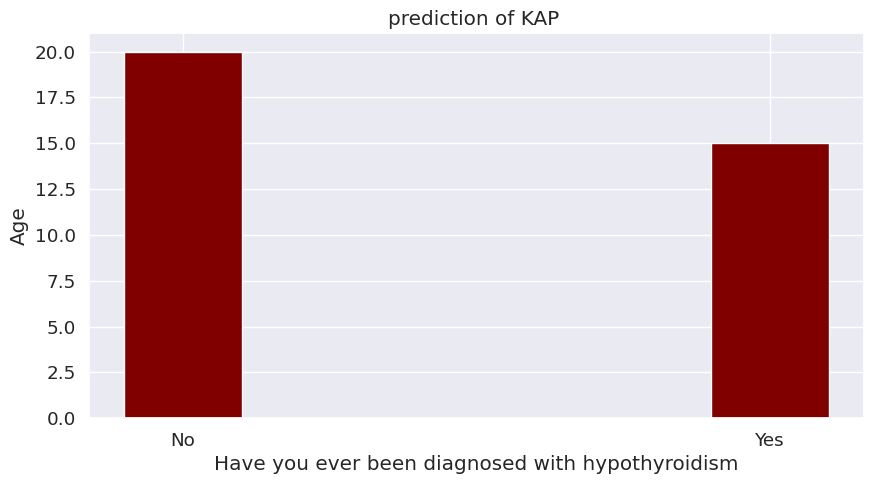

In [ ]:


# creating the dataset
data = {'No':20, 'Yes':15}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.2)

plt.xlabel("Have you ever been diagnosed with hypothyroidism")
plt.ylabel("Age")
plt.title("prediction of KAP ")
plt.show()


In [ ]:
sns.distplot(dataset['Gender'])

KeyError: 'Gender'

ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

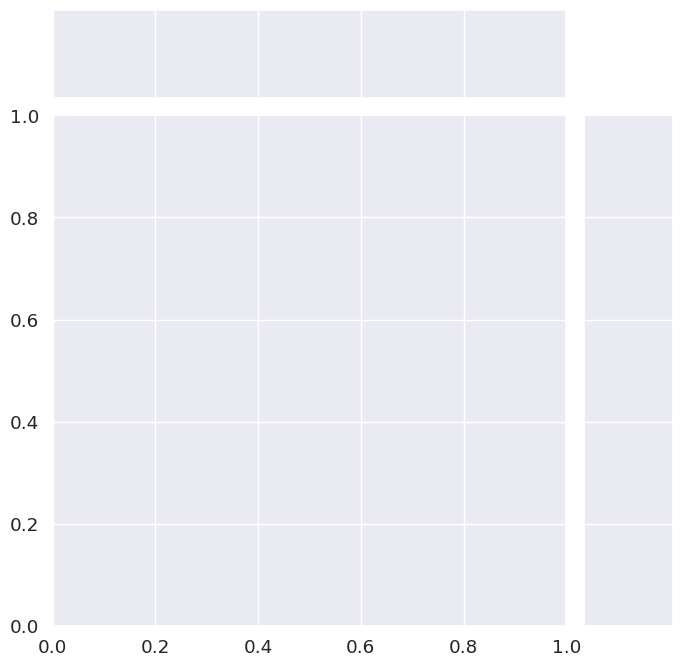

In [ ]:
sns.jointplot(x='Age', y='Have you ever been diagnosed with hypothyroidism', data=dataset, kind='scatter', height=8, color='m')

# Check the column names of your DataFrame
print(dataset.columns)
sns.distplot(dataset['msg_stemmed'])

In [ ]:
dataset=dataset.replace({"Female":1,"Male":0})
dataset

,common symptoms,no_stopwords,msg_stemmed
0,Symptom 1,None,
1,Symptom 2,None,
2,Symptom 3,None,


In [ ]:
dataset=dataset.replace({"Yes":1,"No":0})

In [ ]:
dataset

,common symptoms,no_stopwords,msg_stemmed
0,Symptom 1,None,
1,Symptom 2,None,
2,Symptom 3,None,


print(dataset.columns)
# Assuming the correct column name is different than 'Gender', replace it with the actual column name
sns.distplot(dataset['msg_stemmed'])

<Axes: xlabel='Gender', ylabel='count'>

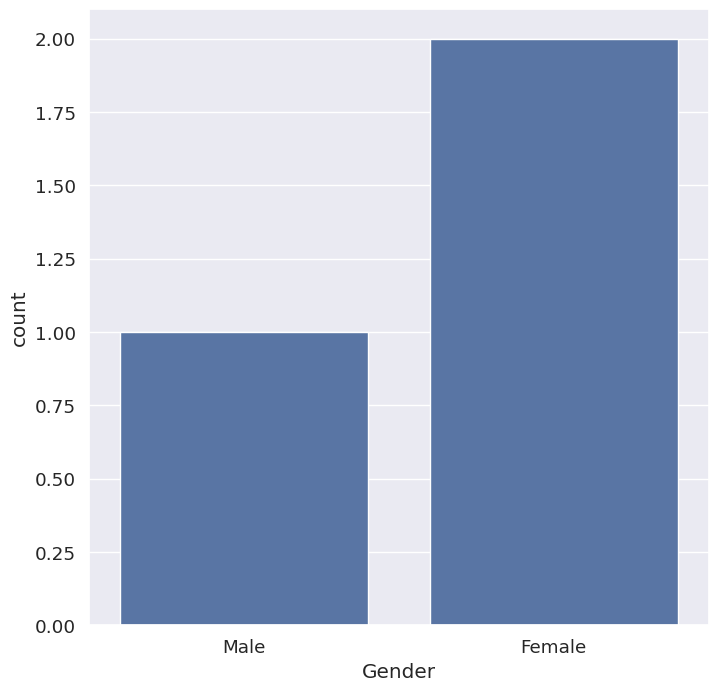

In [ ]:
# Assuming 'dataset' is your existing DataFrame with columns 'no_stopwords' and 'msg_stemmed'

# Create a new DataFrame including the 'Gender' column
dataset_with_gender = pd.DataFrame({
    'no_stopwords': dataset['no_stopwords'],
    'msg_stemmed': dataset['msg_stemmed'],
    'Gender': ['Male', 'Female','Female']  # Replace this with your actual 'Gender' data
})

# Plot the distribution of the 'Gender' column
sns.countplot(data=dataset_with_gender, x='Gender')


In [ ]:
# Check the column names of your DataFrame
print(dataset.columns)

Index(['common symptoms', 'no_stopwords', 'msg_stemmed'], dtype='object')


In [ ]:
dataset.rename(columns={'<Age>': 'msg_stemmed'}, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Plot the distribution of the 'Age' column
    sns.distplot(dataset.loc[:, 'Age'])

    # Set plot labels and title
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.title('Distribution of Age')

    # Show the plot
    plt.show()
except KeyError as e:
    print(f"The 'Age' column does not exist in the DataFrame: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


The 'Age' column does not exist in the DataFrame: 'Age'


In [ ]:
import pandas as pd

# Sample function to calculate age based on some criteria
def calculate_age(row):
  """Calculates age based on the length of the stemmed message"""
  # Check if 'msg_stemmed' exists, handle potential error otherwise
  if 'msg_stemmed' in row.index:
      age = len(row['msg_stemmed'])
  else:
      # Handle the case where 'msg_stemmed' is not present (e.g., assign default value, raise exception)
      age = 0  # Example: Assign 0 as age if the column is missing
      # raise ValueError("Column 'msg_stemmed' not found")  # Example: Raise an exception
  return age

# Assuming 'dataset' is your DataFrame after removing stopwords and stemming the message column
# and 'msg_stemmed' is the column containing the stemmed messages (or a different name)
dataset['Age'] = dataset.apply(calculate_age, axis=1)

# Now, 'age' column has been added to the DataFrame with calculated ages (or appropriate handling)


In [ ]:
dataset['Age'] = dataset.apply(calculate_age, axis=1)

In [ ]:
if 'Age' not in dataset.columns:
    raise ValueError("The 'dataset' DataFrame does not have an 'Age' column.")

In [ ]:
# Check the column names of your DataFrame
print(dataset.columns)
dataset['common symptoms'] = pd.to_numeric(dataset['common symptoms'], errors='coerce')


Index(['common symptoms', 'no_stopwords', 'msg_stemmed', 'Age'], dtype='object')


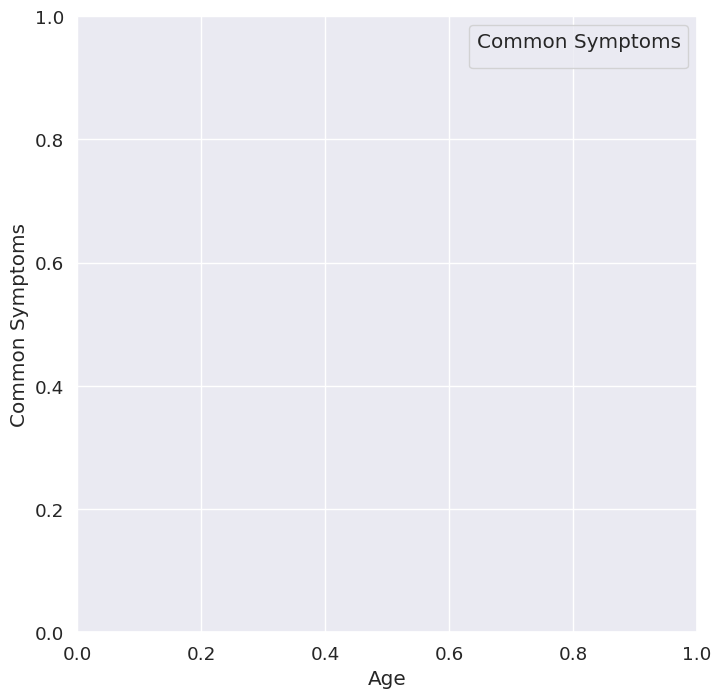

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'common symptoms'
grouped_data = dataset.groupby('common symptoms')

# Create individual boxplots for each group
for name, group in grouped_data:
    print(f"Group: {name}, Count: {len(group)}")  # Check number of data points in each group
    sns.boxplot(x='age', data=group, label=name)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Common Symptoms')
plt.legend(title='Common Symptoms')

# Show the plot
plt.show()


Below comming four code lines are same which represents about the gender and non numeric values in Gender column

In [ ]:
# Load your data into a DataFrame (replace 'your_data.csv' with the actual filename)
dataset = pd.read_csv('project(2).csv')

# Check the column names for any leading or trailing whitespace
dataset.columns = dataset.columns.str.strip()

# Double-check the spelling of the column name
if 'Gender' in dataset.columns:
    # Access the 'Gender' column
    gender_column = dataset['Gender']
    print("First 5 values of 'Gender' column:")
    print(gender_column.head())
else:
    print("'Gender' column not found in the DataFrame. Double-check the column name spelling.")


First 5 values of 'Gender' column:
0    Female
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object


In [ ]:
import pandas as pd

# Check the data type of the 'Gender' column
print("Data type of 'Gender' column:", dataset['Gender'].dtype)

# Remove leading or trailing whitespace from column names
dataset.columns = dataset.columns.str.strip()

# Verify the column name spelling
if 'Gender' in dataset.columns:
    print("'Gender' column is present in the dataset.")
else:
    print("'Gender' column is not present in the dataset.")

# Check for missing values in the 'Gender' column
missing_values = dataset['Gender'].isnull().sum()
print("Number of missing values in 'Gender' column:", missing_values)

# Access the 'Gender' column using different indexing methods
print("First 5 values of 'Gender' column:")
print(dataset['Gender'].head())  # Using column name indexing
print(dataset.iloc[:, dataset.columns.get_loc('Gender')].head())  # Using column index


Data type of 'Gender' column: object
'Gender' column is present in the dataset.
Number of missing values in 'Gender' column: 0
First 5 values of 'Gender' column:
0    Female
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object
0    Female
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object


In [ ]:
import pandas as pd

# Check if 'Gender' is present in the dataset
if 'Gender' in dataset.columns:
    # Check for non-numeric values in the 'Gender' column
    non_numeric_values = dataset['Gender'].apply(lambda x: not pd.to_numeric(x, errors='ignore'))

    # Print the non-numeric values
    print(dataset['Gender'][non_numeric_values])
else:
    print("The 'Gender' column is not present in the dataset.")


Series([], Name: Gender, dtype: object)


In [ ]:
import pandas as pd

# Check for non-numeric values in the 'Gender' column
non_numeric_values = dataset['Gender'].apply(lambda x: not pd.to_numeric(x, errors='ignore'))

# Print the non-numeric values
print(dataset['Gender'][non_numeric_values])

Series([], Name: Gender, dtype: object)


In [ ]:
dataset = dataset.dropna(subset=['Gender'])

below added new code to fill the missing values

In [ ]:
# Fill missing values in the 'Gender' column with the most frequent value
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])


In [ ]:
# Print the shape of the 'Gender' column data
print("Shape of 'Gender' column data:", dataset['Gender'].shape)

# Print the first few rows of the 'Gender' column
print("First few rows of 'Gender' column:\n", dataset['Gender'].head())



Shape of 'Gender' column data: (114,)
First few rows of 'Gender' column:
 0    Female
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object


so here instead of imputers we use the fillna mode() This approach bypasses the need for the SimpleImputer and directly handles missing values within the DataFrame

In [ ]:
# Fill missing values in the 'Gender' column with the most frequent value
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

In [ ]:
import pandas as pd

# Check for non-numeric values in the 'Gender' column
non_numeric_values = dataset['Gender'].apply(lambda x: not pd.to_numeric(x, errors='ignore'))

# Drop rows with non-numeric values
dataset = dataset.drop(dataset.index[non_numeric_values])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

In [ ]:
import pandas as pd

# Assuming `dataset` is your DataFrame

# Select only the numeric columns in the DataFrame
numeric_dataset = dataset.select_dtypes(include='number')

# Compute the correlation matrix for the numeric DataFrame
dataset_corr = numeric_dataset.corr()

# Print the correlation matrix
print(dataset_corr)


        Age  Gender
Age     1.0     NaN
Gender  NaN     NaN


<Axes: >

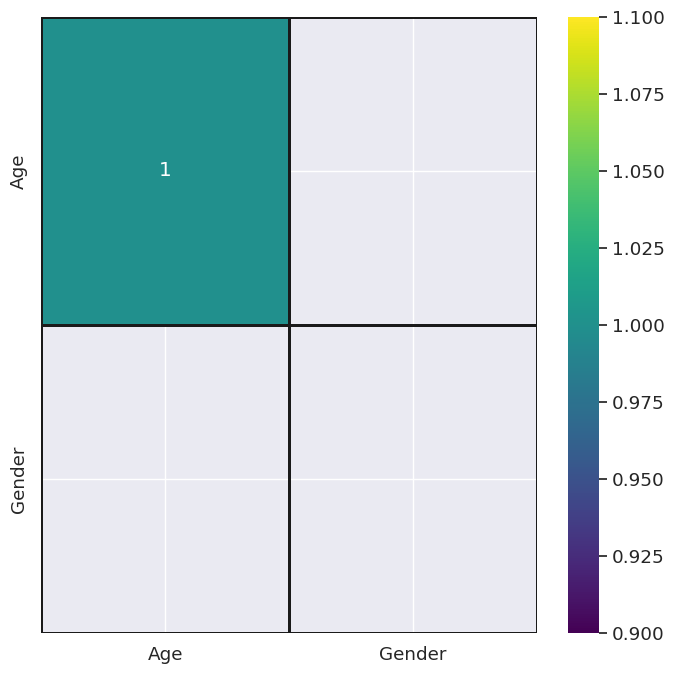

In [ ]:
sns.heatmap(dataset_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [ ]:
dataset.dropna()

,Age,Gender,"Knowledge:\nHow familiar are you with the term ""hypothyroidism"" ?",common symptoms,Have you ever been diagnosed with hypothyroidism,How concerned are you about the impact of hypothyroidism on your overall health,Do you feel well-informed about the available treatment options for hypothyroidism,Are you comfortable discussing hypothyroidism with your healthcare provider,Practices: How regularly do you takeyour prescribed medication for hypothyroidism,Have you made any dietary or lifestyle changes to manage your hypothyroidism,How often do you attend follow-up appointments with your healthcare provider for hypothyroidism,experienced any challenges in managing hypothyroidism
8,20,0,Somewhat familiar,"Weight gain,dryskin,change in voice",No,Neutral,Unsure,Comfortable,Occasionally,Yes,Rarely,No
9,23,0,Not familiar,"Cold ness,sickness,hair loss",No,Neutral,No,Very comfortableon,Occasionally,Yes,Occasionally,Yes
10,21,0,Not familiar,"Throat pain, weight loss, hair fall",No,Neutral,Unsure,Neutral,Never,No,Never,No
11,20,0,Not familiar,"cold intolerance, weight gain, constipation, c...",No,Neutral,No,Comfortable,Never,No,Rarely,No
15,22,0,Very familiar,Don't know,No,Neutral,Yes,Very comfortableon,Rarely,No,Never,Good
18,20,0,Not familiar,No idea,No,Concerned,No,Neutral,Never,No,Never,No
21,19,0,Not familiar,"Weight gain,hair loss ,dry skin",No,Neutral,No,Neutral,Rarely,No,Rarely,No
23,19,0,Not familiar,"Dry skin,muscle pain,constipation",No,Neutral,No,Neutral,Rarely,No,Rarely,Yes
24,19,0,Not familiar,"Cold ness,sickness,hair loss",No,Neutral,No,Neutral,Rarely,No,Rarely,Yes
25,20,0,Somewhat familiar,Swelling of thorat,No,Not concerned,Yes,Very comfortableon,Never,No,Rarely,No


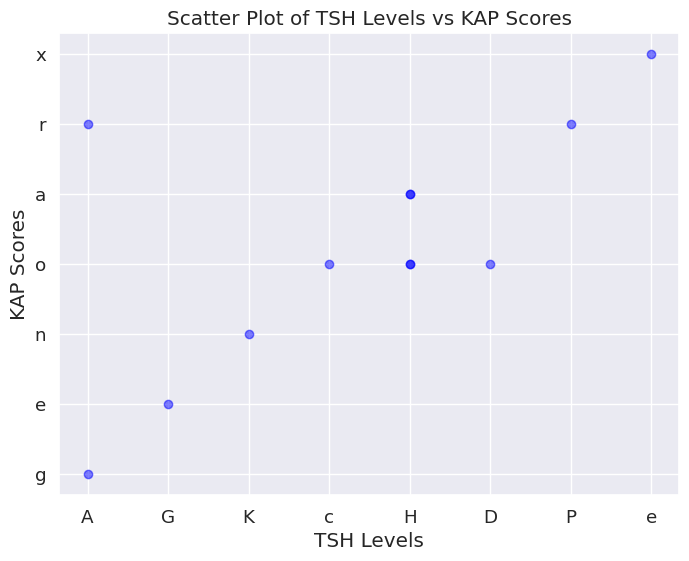

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a dataset 'data' containing hypothyroidism-related features and KAP scores
# Example data format: data = [(tsh_level_1, kap_score_1), (tsh_level_2, kap_score_2), ...]

# Extracting hypothyroidism-related feature (TSH levels) and KAP scores from the dataset
tsh_levels = [entry[0] for entry in dataset]
kap_scores = [entry[1] for entry in dataset]

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tsh_levels, kap_scores, color='blue', alpha=0.5)
plt.title('Scatter Plot of TSH Levels vs KAP Scores')
plt.xlabel('TSH Levels')
plt.ylabel('KAP Scores')
plt.grid(True)
plt.show()


In [ ]:
dataset.columns

Index(['Age', 'Gender',
       'Knowledge:\nHow familiar are you with the term "hypothyroidism" ?',
       'common symptoms', 'Have you ever been diagnosed with hypothyroidism',
       'How concerned are you about the impact of hypothyroidism on your overall health',
       'Do you feel well-informed about the available treatment options for hypothyroidism',
       'Are you comfortable discussing hypothyroidism with your healthcare provider',
       'Practices: How regularly do you takeyour prescribed medication for hypothyroidism',
       'Have you made any dietary or lifestyle changes to manage your hypothyroidism',
       'How often do you attend follow-up appointments with your healthcare provider for hypothyroidism',
       'experienced any challenges in managing hypothyroidism'],
      dtype='object')

In [ ]:
dataset.dtypes

Age                                                                                                 int64
Gender                                                                                              int64
Knowledge:\nHow familiar are you with the term "hypothyroidism" ?                                  object
common symptoms                                                                                    object
Have you ever been diagnosed with hypothyroidism                                                   object
How concerned are you about the impact of hypothyroidism on your overall health                    object
Do you feel well-informed about the available treatment options for hypothyroidism                 object
Are you comfortable discussing hypothyroidism with your healthcare provider                        object
Practices: How regularly do you takeyour prescribed medication for hypothyroidism                  object
Have you made any dietary or lifestyle changes

In [ ]:
dataset.isnull().sum()

Age                                                                                                0
Gender                                                                                             0
Knowledge:\nHow familiar are you with the term "hypothyroidism" ?                                  0
common symptoms                                                                                    6
Have you ever been diagnosed with hypothyroidism                                                   0
How concerned are you about the impact of hypothyroidism on your overall health                    0
Do you feel well-informed about the available treatment options for hypothyroidism                 0
Are you comfortable discussing hypothyroidism with your healthcare provider                        0
Practices: How regularly do you takeyour prescribed medication for hypothyroidism                  0
Have you made any dietary or lifestyle changes to manage your hypothyroidism               

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Define your dataset
texts = []
labels = [0, 1, ...] # Numerical labels corresponding to each text

In [ ]:
# Check if the text is a string before tokenizing
tokenized_texts = []
for text in texts:
    if isinstance(text, str):
        tokenized_texts.append(tokenizer.tokenize(text))
    else:
        print(f"Skipping non-string text: {text}")

# Now tokenized_texts contains only tokenized texts from the valid strings in texts


In [ ]:
# Convert tokens to token IDs
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

In [ ]:
import torch
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define your dataset
texts = ["Age", "Gender", "Knowledge"]
labels = [0, 1, 0]  # Numerical labels corresponding to each text

# Check if the text is a string before tokenizing
tokenized_texts = []
for text in texts:
    if isinstance(text, str):
        tokenized_texts.append(tokenizer.tokenize(text))
    else:
        print(f"Skipping non-string text: {text}")

# Filter out empty tokenized texts
tokenized_texts = [tokens for tokens in tokenized_texts if tokens]

# Convert tokens to token IDs
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

# Pad sequences to the same length if the input_ids list is not empty
if input_ids:
    max_length = max(len(ids) for ids in input_ids)
    padded_input_ids = [ids + [tokenizer.pad_token_id] * (max_length - len(ids)) for ids in input_ids]
else:
    padded_input_ids = []

# Convert labels to PyTorch tensor
labels_tensor = torch.tensor(labels, dtype=torch.int64)

# Convert padded_input_ids to PyTorch tensor
input_ids_tensor = torch.tensor(padded_input_ids, dtype=torch.int64)  # Assuming input IDs are integers

# Now you can use input_ids_tensor and labels_tensor as needed


In [ ]:
# Pad sequences to the same length
max_length = max(len(ids) for ids in input_ids)
padded_input_ids = [ids + [tokenizer.pad_token_id] * (max_length - len(ids)) for ids in input_ids]


In [ ]:
import torch

# Clean the labels list
cleaned_labels = []

for label in labels:
    # Check if the label is a valid number (int or float)
    if isinstance(label, (int, float)):
        cleaned_labels.append(label)
    else:
        print(f"Skipping invalid value: {label}")

# Convert the cleaned list to a PyTorch tensor
labels_tensor = torch.tensor(cleaned_labels, dtype=torch.int64)  # Use the appropriate dtype for your case

# Convert padded_input_ids to a PyTorch tensor
input_ids_tensor = torch.tensor(padded_input_ids, dtype=torch.int64)  # Assuming input IDs are integers

# Now you can use input_ids_tensor and labels_tensor as needed



In [ ]:
# Create attention masks
attention_masks = [[int(token_id != tokenizer.pad_token_id) for token_id in ids] for ids in input_ids]

In [ ]:
# Convert attention_masks to a tensor
train_masks_tensor = torch.tensor(attention_masks)


In [ ]:
import torch

# Create a sample tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Check the size of the tensor
print("Tensor size:", tensor.size())

Tensor size: torch.Size([2, 3])


In [ ]:
import torch

# Define some example tensors
train_inputs = torch.randn(10, 5)  # Example tensor with shape (10, 5)
train_masks = torch.ones(10, 5)    # Example tensor with shape (10, 5)
train_labels = torch.zeros(10)     # Example tensor with shape (10,)

# Check the sizes of the tensors
print("Train inputs size:", train_inputs.size())
print("Train masks size:", train_masks.size())
print("Train labels size:", train_labels.size())


Train inputs size: torch.Size([10, 5])
Train masks size: torch.Size([10, 5])
Train labels size: torch.Size([10])


In [ ]:
#import torch
#
## Assuming train_inputs, train_masks, and train_labels are defined elsewhere
#
## Check the sizes of the tensors
#print("Train inputs size:", train_inputs.size(0))
#print("Train masks size:", train_masks.size(0))
#print("Train labels size:", train_labels.size(0))


In [ ]:
print("Train inputs size:", train_inputs.size(0))
print("Train masks size:", train_masks.size(0))
print("Train labels size:", train_labels.size(0))


Train inputs size: 10
Train masks size: 10
Train labels size: 10


In [ ]:

from torch.utils.data import TensorDataset

# Convert lists to PyTorch tensors
train_inputs_tensor = torch.tensor(train_inputs)
train_labels_tensor = torch.tensor(train_labels)

# Adjust train_masks_tensor to match the number of samples in train_inputs_tensor and train_labels_tensor
train_masks_tensor = torch.tensor(train_masks[:len(train_inputs)])

# Create a TensorDataset for training data
train_data = TensorDataset(train_inputs_tensor, train_masks_tensor, train_labels_tensor)


In [ ]:
# Split data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels, train_masks, val_masks = train_test_split(
input_ids_tensor, labels_tensor, attention_masks, random_state=42, test_size=0.1
)


In [ ]:
print(f"Size of train_labels: {train_labels.size()}")

Size of train_labels: torch.Size([2])


In [ ]:
train_labels = train_labels.expand(train_inputs.size(0))

In [ ]:
train_labels = torch.zeros(train_inputs.size(0), dtype=torch.int64)

In [ ]:
train_labels = torch.zeros(train_inputs.size(0), dtype=torch.long)

In [ ]:
import torch
from torch.utils.data import TensorDataset

# Convert lists to PyTorch tensors
print("Train inputs shape:", train_inputs_tensor.shape)
print("Train masks shape:", train_masks_tensor.shape)
print("Train labels shape:", train_labels_tensor.shape)


# Create a TensorDataset for training data
train_data = TensorDataset(train_inputs_tensor, train_masks_tensor, train_labels_tensor)


Train inputs shape: torch.Size([10, 5])
Train masks shape: torch.Size([10, 5])
Train labels shape: torch.Size([10])


In [ ]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define your dataset
texts = ["Age", "Gender"]
labels = [0, 1]  # Numerical labels corresponding to each text

In [ ]:
# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Set optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)


In [ ]:
from torch.utils.data import DataLoader, Dataset

# Define your custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data):
        # Initialize your dataset here
        self.data = data

    def __len__(self):
        # Return the total number of samples in your dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Implement logic to retrieve a sample from your dataset
        # Return the sample data and its corresponding label
        return self.data[idx]

# Initialize your train_dataset
train_dataset = CustomDataset(dataset)  # Replace project_data with your actual dataset

# Define other necessary parameters
batch_size = 32
shuffle = True

# Initialize your train_dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

# Example data (replace with your actual data)
train_texts = ['Age','Gender', 'Knowledge']
train_labels = [0, 1, 0]  # Example labels

# Tokenize input texts and convert labels to tensors
tokenized_inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")
train_labels_tensor = torch.tensor(train_labels)

# Create a TensorDataset for training data
train_dataset = TensorDataset(tokenized_inputs["input_ids"], tokenized_inputs["attention_mask"], train_labels_tensor)

# Initialize DataLoader for training set
batch_size = 32  # Adjust the batch size as needed
shuffle = True
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

# Example training loop
num_epochs = 8  # Set the number of epochs
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()  # Add the current loss to the total loss
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8, Average Training Loss: 0.7444896697998047
Epoch 2/8, Average Training Loss: 0.744489848613739
Epoch 3/8, Average Training Loss: 0.744489848613739
Epoch 4/8, Average Training Loss: 0.7444897294044495
Epoch 5/8, Average Training Loss: 0.744489848613739
Epoch 6/8, Average Training Loss: 0.7444896697998047
Epoch 7/8, Average Training Loss: 0.744489848613739
Epoch 8/8, Average Training Loss: 0.7444896697998047


In [ ]:
from torch.utils.data import DataLoader

# Assuming you have a dataset called train_dataset
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Now you can use train_dataloader in your loop
total_loss = 0

for batch in train_dataloader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    optimizer.zero_grad()
    outputs = model(inputs, attention_mask=masks, labels=labels)
    loss = outputs.loss
    total_loss += loss.item()  # Add the current loss to the total loss
    loss.backward()
    optimizer.step()
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss}')


Epoch 8/8, Average Training Loss: 0.744489848613739


In [ ]:
# Initialize total_loss before the loop
total_loss = 0

for batch in train_dataloader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    optimizer.zero_grad()
    outputs = model(inputs, attention_mask=masks, labels=labels)
    loss = outputs.loss
    total_loss += loss.item()  # Add the current loss to the total loss
    loss.backward()
    optimizer.step()
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

Epoch 8/8, Average Training Loss: 0.744489848613739


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have PyTorch tensors for validation data (val_inputs, val_masks, val_labels)
# and a batch size (batch_size)
val_inputs_tensor = torch.tensor(val_inputs)
val_masks_tensor = torch.tensor(val_masks)
val_labels_tensor = torch.tensor(val_labels)

# Create a TensorDataset with the validation data tensors
val_dataset = TensorDataset(val_inputs_tensor, val_masks_tensor, val_labels_tensor)

# Create a DataLoader with the validation dataset
# Set batch size as needed (e.g., batch_size = 32)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Validation
model.eval()
val_preds = []
val_true = []

# Iterate through the validation DataLoader
for batch in val_dataloader:
    # Ensure proper indentation for the code block
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch

    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).detach().cpu().numpy()

    # Extend the predictions and true labels lists
    val_preds.extend(preds)
    val_true.extend(labels.cpu().numpy())


In [ ]:
val_accuracy = accuracy_score(val_true, val_preds)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.0


In [ ]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_bert_model')

In [ ]:

from torch.utils.data import TensorDataset, DataLoader
# Assuming train_inputs, train_masks, and train_labels are lists
train_inputs = torch.tensor(train_inputs)
train_masks = torch.tensor(train_masks)
train_labels = torch.tensor(train_labels)

In [ ]:
print("Train inputs size:", train_inputs_tensor.size)

Train inputs size: <built-in method size of Tensor object at 0x7e5e3c0fecf0>


In [ ]:
print("Train inputs size:", train_inputs.size())
print("Train masks size:", train_masks.size())
print("Train labels size:", train_labels.size())


Train inputs size: torch.Size([2, 1])
Train masks size: torch.Size([2, 1])
Train labels size: torch.Size([3])


In [ ]:
import torch
import torch.utils.data

# Assuming train_inputs, train_masks, and train_labels are properly defined

# Adjust the size of train_labels to match train_inputs
train_labels = train_labels[:train_inputs.size(0)]

# Check the sizes of the tensors after adjustment
print("Train inputs size:", train_inputs.size(0))
print("Train masks size:", train_masks.size(0))
print("Train labels size:", train_labels.size(0))

# Ensure that the number of samples in inputs and labels match
assert train_inputs.size(0) == train_labels.size(0), "Number of inputs and labels should match"

# Create DataLoader for the training set
train_data = torch.utils.data.TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)



Train inputs size: 2
Train masks size: 2
Train labels size: 2


In [ ]:
# Create DataLoader for training and validation sets
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
# Assuming val_inputs, val_masks, and val_labels are lists
val_inputs = torch.tensor(val_inputs)
val_masks = torch.tensor(val_masks)
val_labels = torch.tensor(val_labels)

In [ ]:
# Create DataLoader for validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=32)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/project(2).csv")

df.head()

texts = []
labels = []  # Example labels

df["Have you ever been diagnosed with hypothyroidism"].head()

for i in df["common symptoms"]:
  texts.append(i)

for i in df["Have you ever been diagnosed with hypothyroidism"]:
  if i.lower()=="Somewhat familiar".lower():
    labels.append(1)
  else:
    labels.append(0)


print(texts)
print(labels)

['hair fall, weight gain,dry skin', 'Weight loss ,hair fall,ache', 'Dont know', nan, 'hair fall, weight gain', 'hairloss,weight gain,skin disease,dispression', 'Cold ness,sickness,hair loss', 'Dry skin,muscle pain,constipation', 'Weight gain,dryskin,change in voice', 'Cold ness,sickness,hair loss', 'Throat pain, weight loss, hair fall', 'cold intolerance, weight gain, constipation, change in voice, and dry skin', 'Hair loss, delayed puberty, feeling cold', nan, 'Hair fall,wait gain ,dry skin', "Don't know", 'Getting fat or thin, irregular periods,dry skin', 'Weight gain,hair loss ,dry skin', 'No idea', 'Cold ness,sickness,hair loss', 'Dry skin,muscle pain,constipation', 'Weight gain,hair loss ,dry skin', 'Weight loss ,hair fall,ache', 'Dry skin,muscle pain,constipation', 'Cold ness,sickness,hair loss', 'Swelling of thorat', 'Feeling cold,weight gain,hairloss', nan, 'Insomnia , hyperactivity , weight loss', 'Idk', nan, 'Weight gain,hair loss ,dry skin', 'irregular periods, weight gain, 

In [ ]:
df.dropna(subset=['common symptoms'], inplace=True)

# Extract texts and labels from the DataFrame
texts = df['common symptoms'].tolist()

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in texts]

# Pad sequences to the same length
max_length = max(len(ids) for ids in tokenized_texts)
padded_tokenized_texts = [ids + [tokenizer.pad_token_id] * (max_length - len(ids)) for ids in tokenized_texts]



# Convert lists to PyTorch tensors
input_ids = torch.tensor(padded_tokenized_texts)
labels_tensor = torch.tensor(labels)

In [ ]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in texts]

# Pad sequences to the same length
max_length = max(len(ids) for ids in tokenized_texts)
padded_tokenized_texts = [ids + [tokenizer.pad_token_id] * (max_length - len(ids)) for ids in tokenized_texts]

# Convert lists to PyTorch tensors
input_ids = torch.tensor(padded_tokenized_texts)
labels_tensor = torch.tensor(labels)

# Create attention masks
attention_masks = [[int(token_id != tokenizer.pad_token_id) for token_id in ids] for ids in padded_tokenized_texts]
attention_masks_tensor = torch.tensor(attention_masks)

# Define training and validation datasets
#train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels_tensor, test_size=0.2, random_state=42)
#train_masks, val_masks, _, _ = train_test_split(attention_masks_tensor, input_ids, test_size=0.2, random_state=42)

# Define DataLoader for training and validation sets
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the model architecture
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 9
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

# Validation loop
model.eval()
val_preds = []
val_true = []
for batch in val_dataloader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).tolist()
    val_preds.extend(preds)
    val_true.extend(labels.tolist())

# Calculate validation accuracy
val_accuracy = accuracy_score(val_true, val_preds)
print(f'Validation Accuracy: {val_accuracy}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/9, Average Training Loss: 0.7800220251083374
Epoch 2/9, Average Training Loss: 0.5142550468444824
Epoch 3/9, Average Training Loss: 0.5838362574577332
Epoch 4/9, Average Training Loss: 0.7798628807067871
Epoch 5/9, Average Training Loss: 0.633351743221283
Epoch 6/9, Average Training Loss: 0.3907037377357483
Epoch 7/9, Average Training Loss: 0.2950919270515442
Epoch 8/9, Average Training Loss: 0.6892200112342834
Epoch 9/9, Average Training Loss: 0.40093010663986206
Validation Accuracy: 1.0


In [ ]:
import torch

# Assuming padded_input_ids, attention_masks_tensor, and labels_tensor are lists

# Convert lists to PyTorch tensors
padded_input_ids = torch.tensor(padded_input_ids)
attention_masks_tensor = torch.tensor(attention_masks_tensor)
labels_tensor = torch.tensor(labels_tensor)

# Print the sizes of the tensors
print("Size of padded_input_ids:", padded_input_ids.size())
print("Size of attention_masks_tensor:", attention_masks_tensor.size())
print("Size of labels_tensor:", labels_tensor.size())


Size of padded_input_ids: torch.Size([3, 1])
Size of attention_masks_tensor: torch.Size([102, 22])
Size of labels_tensor: torch.Size([114])


In [ ]:
# Assuming labels is a list of labels
labels_tensor = torch.tensor(labels)


In [ ]:
print("Size of padded_input_ids:", padded_input_ids.size())
print("Size of attention_masks_tensor:", attention_masks_tensor.size())
print("Size of labels_tensor:", labels_tensor.size())


Size of padded_input_ids: torch.Size([3, 1])
Size of attention_masks_tensor: torch.Size([102, 22])
Size of labels_tensor: torch.Size([1])
